<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 02
## Laboratorio Clase 06: Desarrollo de Algoritmos

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com. 
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
* __La entrega es al final de esta clase.__

__Nombre__: Cristóbal Montecino

__Rol__: 201710019-2

## Ejercicio 1 (2 ptos.): 
Utilizando los datos del Gasto Fiscal Neto de Chile, crea una nueva columna del tipo `datetime` llamada `dt_date` utilizando `anio`, `mes` y el día primero de cada mes.

In [3]:
import os
import numpy as np
import pandas as pd

Utilizaremos como ejemplo un dataset de gasto fiscal neto en Chile, obtenidos de una [datathon de DataCampfire](https://datacampfire.com/datathon/).

In [4]:
gasto_raw = pd.read_csv(os.path.join("data", "gasto_fiscal.csv"), sep=";")
gasto_raw.head()

,anio,mes,partida,capitulo,programa,subtitulo,monto
0,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082
1,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607
2,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668
3,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741
4,2009,Abril,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107


Pasos a seguir:

1. Renombra la columna `anio` por `year`.
2. Crea la columna `month` utilizando el diccionario `es_month_dict` definido abajo. Hint: Usar un mapeo.
3. Crea la columna `day` en que todos los registros sean igual a `1`.
4. Crea la columna `dt_date` con la función `pd.to_datetime`. Lee la documentación!
5. Finalmente, elimina las columnas `year`, `mes`, `month`, `day`.

In [5]:
es_month_dict = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3, 
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

In [10]:
gasto = (
    gasto_raw.rename(columns={'anio': 'year'})
    .assign(
        month=lambda x: x["mes"].str.lower().map(es_month_dict),
        day=1,
        dt_date=lambda x: pd.to_datetime(x.loc[:, ['year', 'month', 'day']]),
    ).drop(columns=['year', 'mes', 'month', 'day'])
)
gasto.head()

,partida,capitulo,programa,subtitulo,monto,dt_date
0,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,21082,2009-04-01
1,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,BIENES Y SERVICIOS DE CONSUMO,152607,2009-04-01
2,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,GASTOS EN PERSONAL,552668,2009-04-01
3,Congreso Nacional,Biblioteca Del Congreso,Biblioteca Del Congreso,INICIATIVAS DE INVERSIÓN,4741,2009-04-01
4,Congreso Nacional,Biblioteca Del Congreso,Proyecto Fortalecimiento Institucional,ADQUISICIÓN DE ACTIVOS NO FINANCIEROS,26107,2009-04-01


## Ejercicio 2 (1 pto.)

Pivotea el dataframe `gasto_raw` tal que:

- Los índices sean los ministerios (partidas).
- Las columnas sean los años.
- Cada celda sea la suma de los montos.
- Rellenar las celdas vacías con `""`.

¿Cuáles son las combinaciones de Año-Ministerio que no tienen gasto?

In [28]:
gasto_raw['anio'].sort_values().unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [22]:
gasto_raw.pivot_table(
    index='partida',
    columns='anio',
    values='monto',
    aggfunc='sum',
    fill_value='',
)

anio,2009,2010,2011,2012,2013,2014,2015,2016,2017
partida,,,,,,,,,
Congreso Nacional,1.05681e+08,1.0872e+08,1.06608e+08,1.17128e+08,1.19234e+08,1.24923e+08,1.25306e+08,1.19049e+08,1.184219e+08
Contraloría General De La República,6.09712e+07,6.28753e+07,6.91076e+07,7.20093e+07,7.77076e+07,8.42078e+07,8.68017e+07,7.92463e+07,8.162589e+07
Ministerio De Agricultura,3.77022e+08,3.86054e+08,4.00569e+08,4.24798e+08,4.39537e+08,4.67417e+08,4.74115e+08,4.81511e+08,5.024488e+08
Ministerio De Bienes Nacionales,3.71536e+07,3.43051e+07,3.17418e+07,2.45177e+07,2.78306e+07,2.44298e+07,2.2866e+07,2.34519e+07,2.232459e+07
Ministerio De Defensa Nacional,2.31754e+09,2.55618e+09,2.61631e+09,1.57753e+09,1.63265e+09,1.66675e+09,1.72282e+09,1.70836e+09,1.707371e+09
Ministerio De Desarrollo Social,2.97567e+08,2.59518e+08,3.85802e+08,4.17218e+08,4.41815e+08,4.58259e+08,5.2083e+08,4.70376e+08,4.426318e+08
"Ministerio De Economía, Fomento Y Turismo",3.94555e+08,3.92598e+08,3.77712e+08,3.95883e+08,4.16447e+08,4.81158e+08,5.55232e+08,5.76002e+08,5.903999e+08
Ministerio De Educación,5.20953e+09,5.57996e+09,5.69485e+09,6.24088e+09,6.79734e+09,7.11555e+09,7.91828e+09,8.66906e+09,9.230079e+09
Ministerio De Energía,,2.4742e+07,4.77049e+07,4.40517e+07,8.02784e+07,1.10942e+08,1.31438e+08,1.46529e+08,1.427252e+08


__Respuesta__:

|Ministerio|Años|
|-|-|
|Ministerio De Energía|2009|
|Ministerio De La Mujer Y La Equidad De Género|2009-2015|
|Ministerio Del Deporte|2009-2013|
|Ministerio Del Medio Ambiente|2009|
|Servicio Electoral|2009 - 2016|

## Ejercicio 3 (1 pto.)

Realiza los benchmarks del archivo `benchmark_loop.py` que se encuentra en el directorio `fast_pandas`.

¿Cuál forma dirías que es la más eficiente?

Utiliza el comando mágico `%load` y edita de tal manera que el módulo `Benchmarker` se importe correctamente.

Benchmarking function:  df_values
	Testing with a dataframe of size:  100
	Result (seconds):  3.576299999622279e-05
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0002777669999977661
	Testing with a dataframe of size:  10000
	Result (seconds):  0.002646879999974772
	Testing with a dataframe of size:  100000
	Result (seconds):  0.02882777000004353
	Testing with a dataframe of size:  1000000
	Result (seconds):  0.29783320000024105
Benchmarking function:  itertuples_function
	Testing with a dataframe of size:  100
	Result (seconds):  0.0013910940000005211
	Testing with a dataframe of size:  1000
	Result (seconds):  0.0026508190000004107
	Testing with a dataframe of size:  10000
	Result (seconds):  0.017680349999955068
	Testing with a dataframe of size:  100000
	Result (seconds):  0.17078534000002038
	Testing with a dataframe of size:  1000000
	Result (seconds):  1.6431943000006868
Benchmarking function:  iterrows_function
	Testing with a dataframe of size:  100
	Result (se

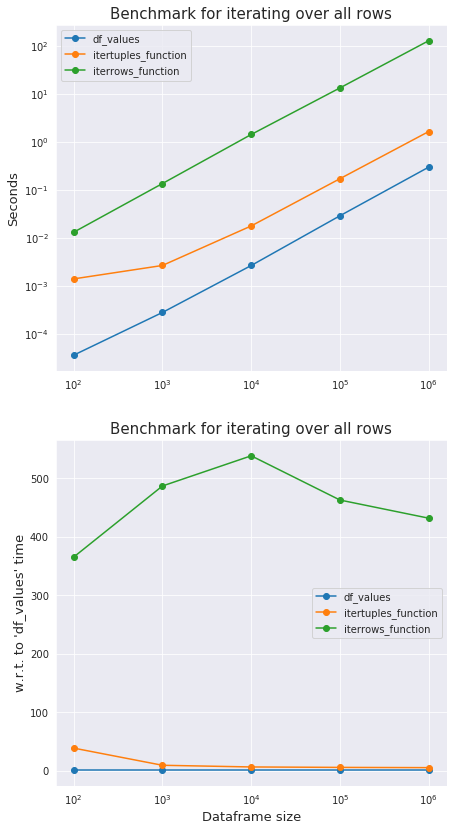

In [29]:
# %load fast_pandas/benchmark_loop.py
from fast_pandas.Benchmarker import Benchmarker

def iterrows_function(df):
    for index, row in df.iterrows():
        pass


def itertuples_function(df):
    for row in df.itertuples():
        pass


def df_values(df):
    for row in df.values:
        pass



params = {
    "df_generator": 'pd.DataFrame(np.random.randint(1, df_size, (df_size, 4)), columns=list("ABCD"))',
    "functions_to_evaluate": [df_values, itertuples_function, iterrows_function],
    "title": "Benchmark for iterating over all rows",
    "user_df_size_powers": [2, 3, 4, 5, 6],
    "user_loop_size_powers": [2, 2, 1, 1, 1],
}

benchmark = Benchmarker(**params)
benchmark.benchmark_all()
benchmark.print_results()
benchmark.plot_results()


__Respuesta__: df_values